Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ivo Willemse,2013500"
COLLABORATORS = ""

---

# Predicting the number of your customers

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 


Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [2]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u \geq 0$ and standard deviation $\sigma_u \geq 0$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


-------------

**Exercise**

What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]

--------------

Je ziet dan ook de kleine nummers in een grafiek. Anders zou je die niet zien door de grote getallen. Door de logaritmische schaal zie je beide goed.

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency back into the past years. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 

In [3]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(end = todays_date, periods=number_of_periods, freq='M')
columns = ['log number of customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 1.0

p_0 = [0.2]
p_1 = [0.6]
period_0 = 12
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

rho = part of customers that stay
ut = standaard verdeeld met mu en sigma

x =[] maakt een lege lijst
s.append vult deze lege lijst


---------
    
**Exercise**

Explain what the code above does:

* what is `vector_p` and how is it generated?
* what is the type of `x`? How is this vector generated?
* show what the first couple of rows of the `df_customers` look like.

vector p zorgt voor een lage prijs in de eerste periode en een hoge prijs in de late periode. Het zorgt voor een lijst van 12 keer p_0 en 12 keer p_1
x is de log of the number of customers

In [10]:
[0.3,0.2]*2 # als je vermenigvuldigt in python krijg je twee keer de lijst 
#niet zoals bij de numpy arrays waar de waardes worden vermenigvuldig

[0.3, 0.2, 0.3, 0.2]

In [8]:
df_customers.iloc[7],df_customers.loc['2016-04-30'] #hier slice je een element mee let op loc en iloc
df_customers['log number of customers'] #hier slice je een kolom mee

2016-04-30    3.782265
2016-05-31    4.087569
2016-06-30    3.328820
2016-07-31    4.357164
2016-08-31    3.809434
2016-09-30    2.342263
2016-10-31    4.083713
2016-11-30    2.488147
2016-12-31    2.014379
2017-01-31    1.221972
2017-02-28    0.005619
2017-03-31    0.193480
2017-04-30    1.826411
2017-05-31    2.087705
2017-06-30    1.991999
2017-07-31   -0.258090
2017-08-31    1.430361
2017-09-30    0.847387
2017-10-31    1.501936
2017-11-30    3.063858
2017-12-31    2.412968
2018-01-31    1.019191
2018-02-28   -0.607778
2018-03-31    0.872626
Freq: M, Name: log number of customers, dtype: float64

-----------

**Exercise**

Calculate the number of customers in each of the periods. [hint: you may want to check numpy's `exp` function]

-----------

In [11]:
df_customers.head()

,log number of customers
2016-04-30,3.782265
2016-05-31,4.087569
2016-06-30,3.328820
2016-07-31,4.357164
2016-08-31,3.809434


In [12]:
np.exp(df_customers['log number of customers'])

2016-04-30    43.915402
2016-05-31    59.594820
2016-06-30    27.905389
2016-07-31    78.035519
2016-08-31    45.124878
2016-09-30    10.404756
2016-10-31    59.365508
2016-11-30    12.038946
2016-12-31     7.496073
2017-01-31     3.393875
2017-02-28     1.005635
2017-03-31     1.213465
2017-04-30     6.211555
2017-05-31     8.066385
2017-06-30     7.330171
2017-07-31     0.772526
2017-08-31     4.180207
2017-09-30     2.333542
2017-10-31     4.490375
2017-11-30    21.410002
2017-12-31    11.167057
2018-01-31     2.770954
2018-02-28     0.544560
2018-03-31     2.393186
Freq: M, Name: log number of customers, dtype: float64

-----------

**Exercise**

Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas or google "python pandas average" to see how to calculate an average in a dataframe]

-----------

In [13]:
df_customers['number of customers'] = np.exp(df_customers['log number of customers'])

In [14]:
df_customers['number of customers'].mean()

17.548532678865882

In [15]:
df_customers['number of customers'].median()

7.413121888288264

On the basis of the mean, you might conclude that you should expect around 30 customers on average (this can be different in your notebook as we are using random numbers here).

-----------

**Exercise**

To get an idea on whether this is realistic, also calculate the median number of customers. What do you learn from this?

--------------

In [ ]:
#zie hierboven

YOUR ANSWER HERE

To get some idea on how the number of customers varies over time, we will plot the number of customers together with two moving averages: one moving average over 3 months, the other over 6 months.

In [16]:
df_customers['MA_3'] = df_customers['number of customers'].rolling(window=3).mean()
df_customers['MA_6'] = df_customers['number of customers'].rolling(window=6).mean()

------------

**Exercise**

Plot the number of customers and the moving averages defined above.

-------------

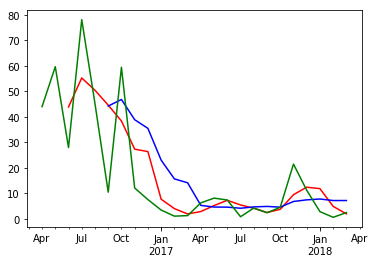

In [23]:
df_customers['MA_3'].plot(color='red')
df_customers['MA_6'].plot(color='blue')
df_customers['number of customers'].plot(color='green')

Consider the first couple of rows of the dataframe `df_customers`.

----------

**Exercise**

Why does "NaN" mean and why do they appear? Hint: use google if you do not know what "NaN" stands for.

-----------

Je hebt drie observaties voordat je de eerste uitkomst krijgt bij de moving average
NaN = not a number

YOUR ANSWER HERE

--------------

**Exercise**

Add a column to `df_customers` with the price per period.

------------

In [26]:
df_customers['price'] = vector_p[1:]

Assume that your costs per sale equal 0.1.

-----------

**Exercise**

Add a column `profits` to the dataframe.

-----------


In [ ]:
df_customers['proftis'] = (df_customers['price'] - 0.1)*df_customers['number of customers']

------------

**Exercise**

Plot the number of customers against profit. Explain the shape of curve that you see.

------------

In [30]:
#zie bericht simo op whatsapp voor goede uitwerking

NameError: name 'scatter' is not defined

YOUR ANSWER HERE